### Import Libraries & set variables

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation


In [21]:
bins = 25
vmin = 0
vmax = 1
ticks = np.linspace(vmin, vmax, num=bins)
seed = 10
number_of_nodes = 100

title_font = {'fontname': 'Arial', 
            'size': 25, 
            'color': 'black', 
            'weight': 'normal',
            'verticalalignment': 'bottom'
            }

title_loc = 'center'
x_y_label_font = {'size': 20}

histogram_title = 'Degree Centrality Histogram of a '
histogram_xlabel = 'Degree Centrality'
histogram_ylabel = 'Count'

prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_edges = list(range(1, 10))


### Functions for creating animations

In [50]:
def update_fig_graph(i, ax, iteration, update_func):
    ax.clear()
    update_func(iteration[i],ax)


def create_and_save_animation(graph='erdos_renyi',graph_type='histogram'):

    fig, ax = plt.subplots(figsize=(15,10))
    plt.close()

    gif_file_path = graph+ '_' + graph_type + r'.gif'

    if graph == 'erdos_renyi':
        print('Creating animation for Erdos-Renyi Graph')
        iteration = prob
        if graph_type == 'histogram':
            print('histogram')
            update_func = plot_histogram_erdos_renyi
        else:
            print('animation for networkx')
            update_func = plot_graph_erdos_renyi

    elif graph == 'barabasi_albert':
        print('Creating animation for Barabasi-Albert Graph')
        iteration = num_edges
        if graph_type == 'histogram':
            print('histogram')
            update_func = plot_histogram_barabasi_albert
        else:
            print('animation for networkx')
            update_func = plot_graph_barabasi_albert
        
    
    ani_graph =animation.FuncAnimation(fig, 
                                update_fig_graph, 
                                frames=len(iteration),
                                fargs=(ax,iteration, update_func),
                                )

    writergif = animation.PillowWriter(fps=1) 
    ani_graph.save(gif_file_path, writer=writergif)

    return gif_file_path

def display_animation(gif_file_path):
    from IPython.display import Image
    display(Image(data=open(gif_file_path,'rb').read(), format='png'))



### Erdos Renyi Random Graph aka Binomial graph:

1. Defination: 

- Variant 1:  Graph such that , given 'n' nodes, the probablity that the edge ('i', 'j') exists is 'p'. It aka binomial graph 
- Variant 2: 
- Note: Only variant 1 is implemented in networkx yet.

        

2. Probablity:

- The degree distribution of the graph follows a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

$$ P(degree = k ) = \binom{n}{k} p^k q^(n-k)$$ 








In [51]:
def plot_histogram_erdos_renyi(p, ax, number_of_nodes=number_of_nodes, ticks=ticks, bins=bins):

    graph_type='erdos_renyi'
    additional_info = f', p = {p}'

    graph = nx.erdos_renyi_graph(number_of_nodes, p=p, seed=seed, directed=False)
    degree_centrality = nx.degree_centrality(graph)

    ax.hist(degree_centrality.values(), bins=bins)

    ax.set_xticks(ticks=ticks)  # set the x axis ticks
    ax.set_title(histogram_title + graph_type + additional_info, fontdict=title_font, loc=title_loc)
    ax.set_xlabel(histogram_xlabel, fontdict=x_y_label_font)
    ax.set_ylabel(histogram_ylabel,fontdict=x_y_label_font)


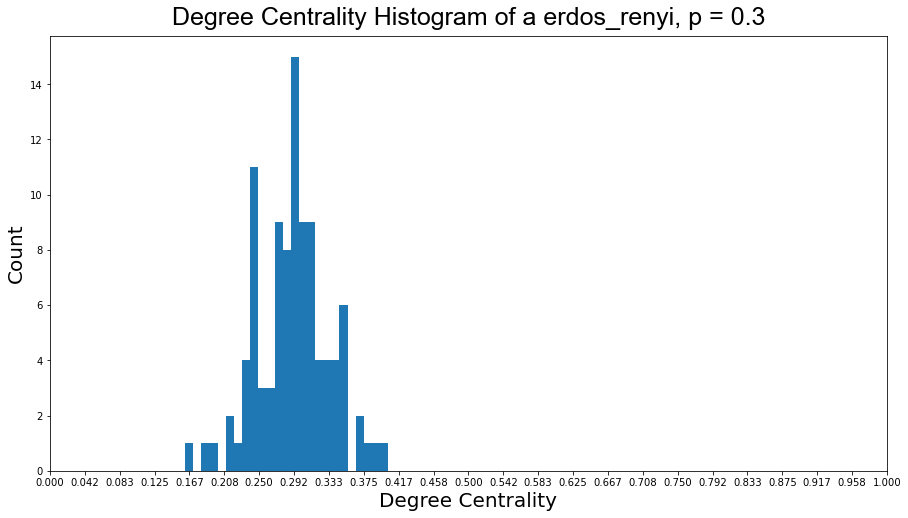

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_histogram_erdos_renyi(0.3, ax)

Creating animation for Erdos-Renyi Graph
histogram


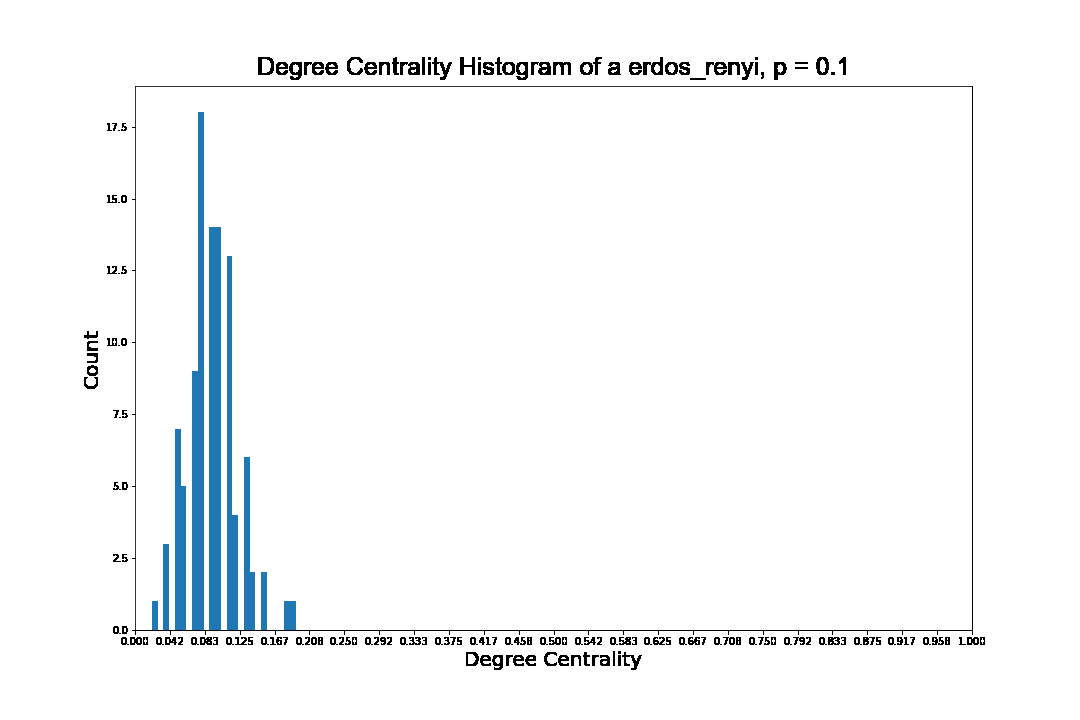

Erdos Renyi Histogram saved to:  erdos_renyi_histogram.gif


In [53]:
erdos_renyi_histogram_path = create_and_save_animation(graph='erdos_renyi',graph_type='histogram')
display_animation(erdos_renyi_histogram_path)
print('Erdos Renyi Histogram saved to: ', erdos_renyi_histogram_path)

In [54]:
def plot_graph_erdos_renyi(p, ax, number_of_nodes=number_of_nodes, seed=seed):
    
    graph = nx.erdos_renyi_graph(number_of_nodes, p=p, seed=seed, directed=False)
    degree_centrality = nx.degree_centrality(graph)

    positon = nx.random_layout(graph, seed=seed)
    graph_type = 'Erdos Renyi'
    additional_info = f', p = {p}'
    
    values_plot = degree_centrality.values()
    ax.set_title(graph_type + additional_info, fontdict=title_font, loc=title_loc)


    nx.draw(graph, 
            ax=ax,
            pos=positon,
            node_size=[int(v*1000) for v in values_plot], 
            node_color=list(values_plot),
            edge_color='black',
            alpha=0.7,
            cmap=plt.cm.YlGnBu,

           )



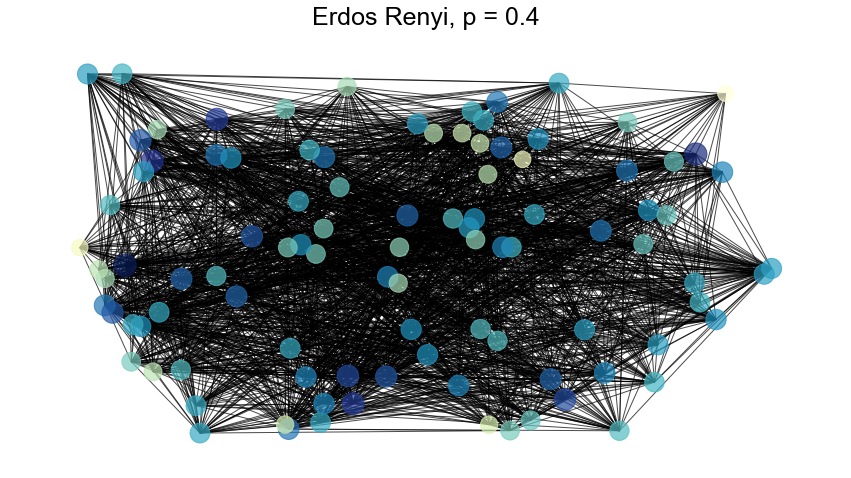

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_graph_erdos_renyi(0.4, ax)


Creating animation for Erdos-Renyi Graph
animation for networkx


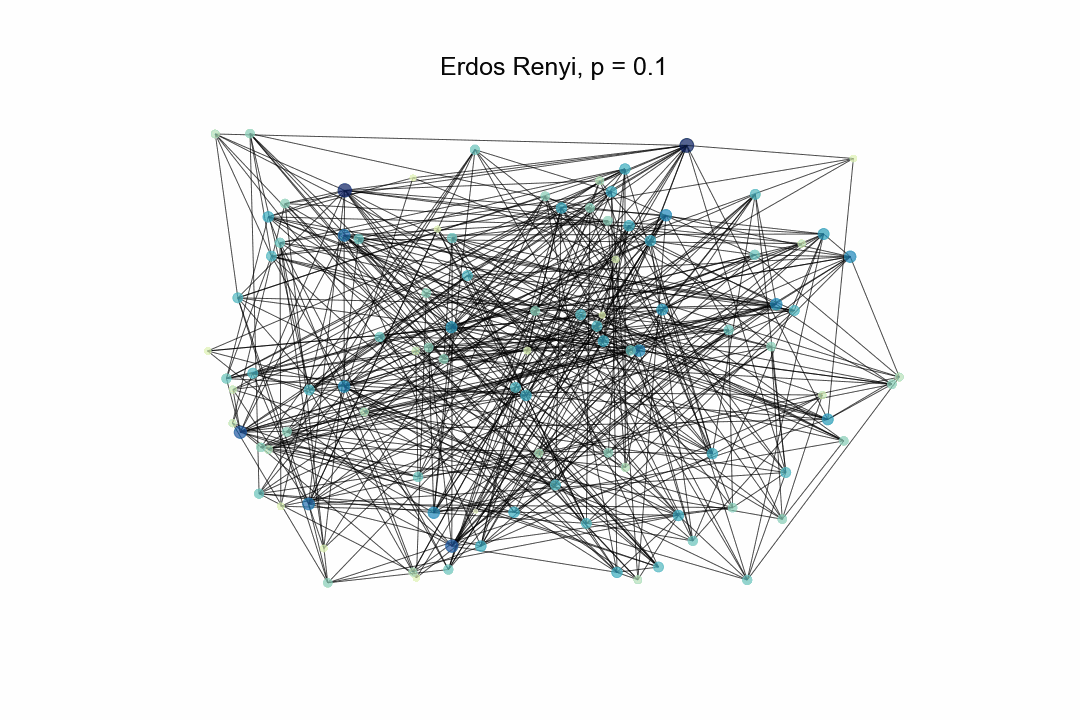

erdos_renyi_networkx_graph.gif


In [56]:
erdos_renyi_graph_path = create_and_save_animation(graph='erdos_renyi',graph_type='networkx_graph')

display_animation(erdos_renyi_graph_path)
print(erdos_renyi_graph_path)



### Barabasi Albert Graph

In [35]:
m = 12
def plot_graph_barbasi_albert(m, ax, number_of_nodes=number_of_nodes,seed=seed):

        graph = nx.barabasi_albert_graph(number_of_nodes, m, seed=seed, initial_graph=None)
        degree_centrality = nx.degree_centrality(graph)

        positon = nx.random_layout(graph, seed=seed)
        graph_type = 'Barbasi Albert'
        additional_info = f', m = {m}'

        ax.set_title(graph_type + additional_info, fontdict=title_font, loc=title_loc)


        nx.draw(graph, 
                pos=positon,
                node_color=list(degree_centrality.values()), 
                cmap=plt.cm.YlOrBr,
                vmin=0,
                vmax=1,
                node_size= [int(v*1000) for v in degree_centrality.values()],
                alpha = 0.8,
                ax=ax
                )
        return ax
        



In [36]:
def plot_histogram_barabasi_albert(m, ax, number_of_nodes=number_of_nodes, ticks=ticks, bins=bins):

    graph_type='barabasi_albert'
    additional_info = f', m = {m}'

    graph = nx.barabasi_albert_graph(number_of_nodes, m=m, seed=seed)

    degree_centrality = nx.degree_centrality(graph)

    ax.hist(degree_centrality.values(), bins=bins)

    ax.set_xticks(ticks=ticks)  # set the x axis ticks
    ax.set_title(histogram_title + graph_type + additional_info, fontdict=title_font, loc=title_loc)
    ax.set_xlabel(histogram_xlabel, fontdict=x_y_label_font)
    ax.set_ylabel(histogram_ylabel,fontdict=x_y_label_font)


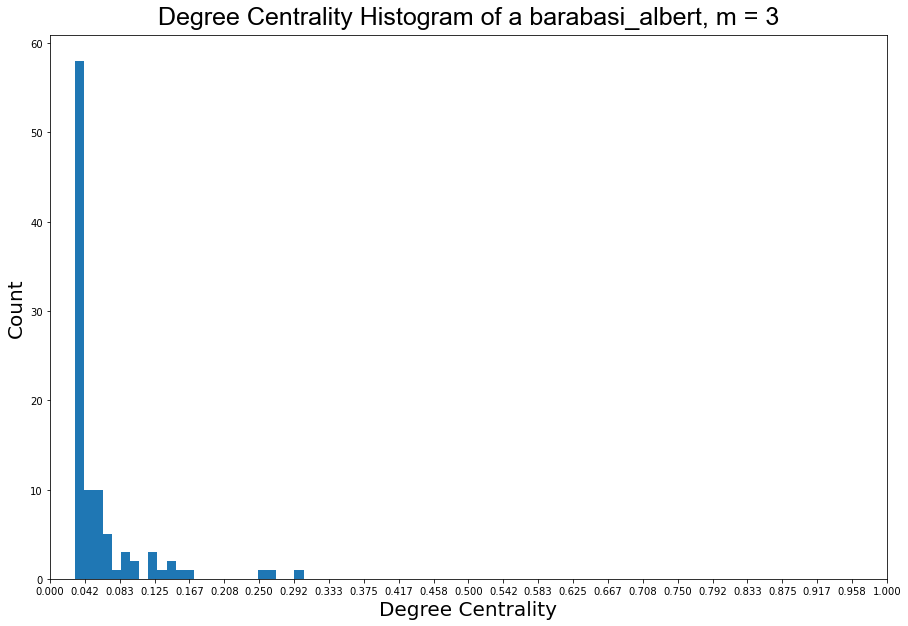

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

plot_histogram_barabasi_albert(m=3, ax=ax)

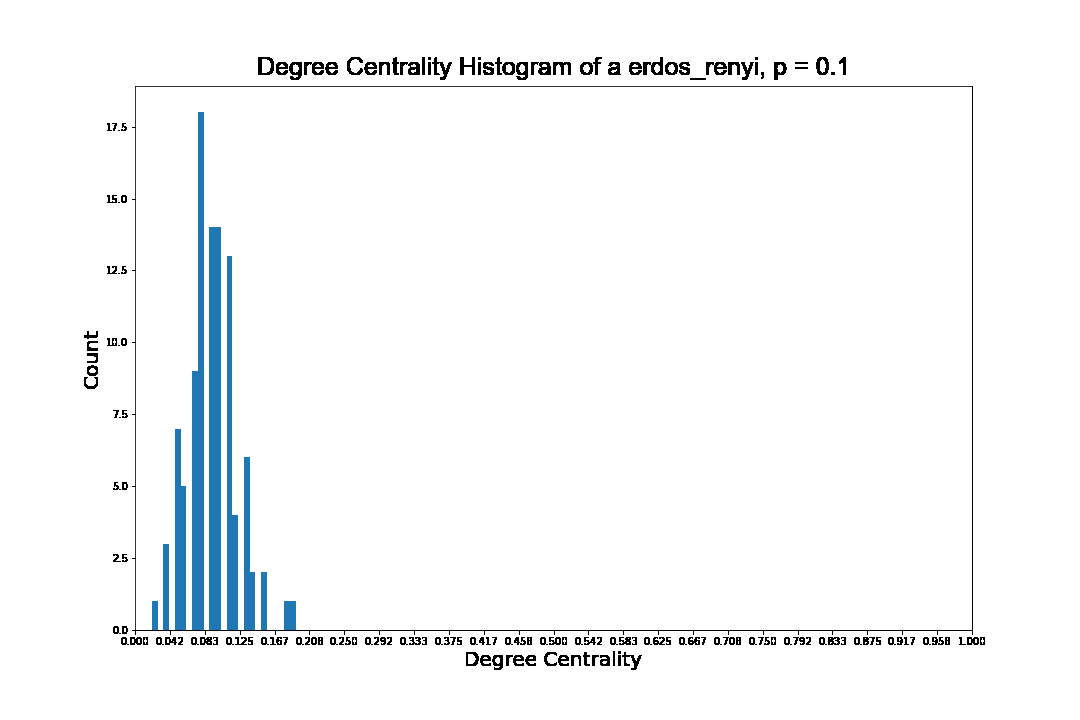

In [39]:
barabasi_albert_graph_path = create_and_save_animation(graph_type='barabasi_albert', graph='networkx_graph')

display_animation(barabasi_albert_graph_path)
